In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input 
from tensorflow.keras.losses import categorical_crossentropy

2024-06-13 06:04:02.565245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 06:04:03.702340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#  Building our Model To train the data 

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/teamspace/studios/this_studio/Emotion-Detection-openCV/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 1 classes.


{'train': 0}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

In [6]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.flow_from_directory()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

AttributeError: 'DirectoryIterator' object has no attribute 'flow_from_directory'

Found 350 images belonging to 7 classes.


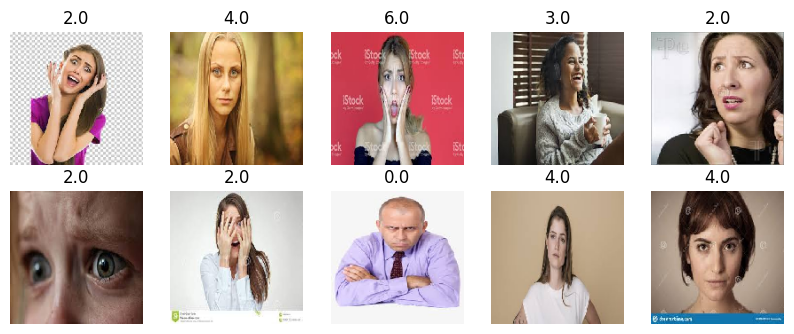

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
path_to_train_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'

# Create the generator
train_generator = train_datagen.flow_from_directory(
    path_to_train_directory,  
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Function to plot images
def plotImages(img_arr, labels):
    """
    Input  :- images array and labels
    Output :- plots the images
    """
    count = 0
    plt.figure(figsize=(10, 10))
    for im, lbl in zip(img_arr, labels):
        plt.subplot(5, 5, count + 1)
        plt.imshow(im)
        plt.title(lbl)
        plt.axis('off')
        count += 1
        if count == 10:
            break
    plt.show()

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Plot the images
plotImages(images, labels)


# having early stopping and model check point

In [9]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [10]:
hist = model.fit(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 7)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

path_to_train_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'
path_to_val_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the training and validation generators
train_generator = train_datagen.flow_from_directory(
    path_to_train_directory, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    path_to_val_directory, 
    batch_size=32,
    class_mode='binary'
)

# Set up callbacks
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Fit the model
hist = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_generator,
    validation_steps=8,
    callbacks=[es, mc]
)


Found 350 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1300 - loss: -301.6932

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 67500, but received input with shape (None, 196608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

path_to_train_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'
path_to_val_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the training and validation generators
train_generator = train_datagen.flow_from_directory(
    path_to_train_directory, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    path_to_val_directory, 
    target_size=(150, 150),  # Add this line to specify target size for validation data
    batch_size=32,
    class_mode='binary'
)

# Set up callbacks
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Fit the model
hist = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_generator,
    validation_steps=8,
    callbacks=[es, mc]
)


Found 350 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Epoch 1/30


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1361 - loss: -266.8440
Epoch 1: val_loss improved from inf to -1918.26245, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.1356 - loss: -433.6776 - val_accuracy: 0.1523 - val_loss: -1918.2625
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1562 - loss: -1894.8788
Epoch 2: val_loss improved from -1918.26245 to -2404.05859, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1562 - loss: -1894.8788 - val_accuracy: 0.1383 - val_loss: -2404.0586
Epoch 3/30


2024-06-13 06:12:02.727611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-13 06:12:02.761629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1185 - loss: -2469.6538
Epoch 3: val_loss improved from -2404.05859 to -4251.32617, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1304 - loss: -2717.3037 - val_accuracy: 0.1523 - val_loss: -4251.3262
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0625 - loss: -4970.5439
Epoch 4: val_loss improved from -4251.32617 to -4938.02979, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0625 - loss: -4970.5439 - val_accuracy: 0.0851 - val_loss: -4938.0298
Epoch 5/30


2024-06-13 06:12:03.668769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:03.696657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1206 - loss: -5812.7061
Epoch 5: val_loss improved from -4938.02979 to -7470.62354, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1279 - loss: -5785.5693 - val_accuracy: 0.1523 - val_loss: -7470.6235
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1250 - loss: -7895.2012
Epoch 6: val_loss did not improve from -7470.62354
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1250 - loss: -7895.2012 - val_accuracy: 0.1170 - val_loss: -6363.2393
Epoch 7/30


2024-06-13 06:12:04.558878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:04.587540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1219 - loss: -7804.1836
Epoch 7: val_loss improved from -7470.62354 to -10891.51855, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1278 - loss: -8292.9727 - val_accuracy: 0.1484 - val_loss: -10891.5186
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1875 - loss: -9019.4482
Epoch 8: val_loss improved from -10891.51855 to -11255.46289, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: -9019.4482 - val_accuracy: 0.1064 - val_loss: -11255.4629
Epoch 9/30


2024-06-13 06:12:05.428848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:05.456434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1390 - loss: -10905.0732
Epoch 9: val_loss improved from -11255.46289 to -14144.47852, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1430 - loss: -11229.3252 - val_accuracy: 0.1367 - val_loss: -14144.4785
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0938 - loss: -19884.6484
Epoch 10: val_loss did not improve from -14144.47852
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0938 - loss: -19884.6484 - val_accuracy: 0.1489 - val_loss: -14020.2246
Epoch 11/30


2024-06-13 06:12:06.382489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:06.419827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1609 - loss: -16117.2119
Epoch 11: val_loss improved from -14144.47852 to -19993.48438, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.1581 - loss: -16286.5166 - val_accuracy: 0.1406 - val_loss: -19993.4844
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0667 - loss: -17287.6680
Epoch 12: val_loss did not improve from -19993.48438
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0667 - loss: -17287.6680 - val_accuracy: 0.1383 - val_loss: -18067.8691
Epoch 13/30


2024-06-13 06:12:07.323475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:07.351662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1390 - loss: -19540.6133
Epoch 13: val_loss improved from -19993.48438 to -24289.28516, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1428 - loss: -19971.0957 - val_accuracy: 0.1445 - val_loss: -24289.2852
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0312 - loss: -31057.9336
Epoch 14: val_loss improved from -24289.28516 to -25202.07422, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0312 - loss: -31057.9336 - val_accuracy: 0.1277 - val_loss: -25202.0742
Epoch 15/30


2024-06-13 06:12:08.112771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:08.142178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0753 - loss: -28260.5645
Epoch 15: val_loss improved from -25202.07422 to -27435.43945, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1007 - loss: -27228.1328 - val_accuracy: 0.1641 - val_loss: -27435.4395
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2000 - loss: -32189.8184
Epoch 16: val_loss improved from -27435.43945 to -35986.18750, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2000 - loss: -32189.8184 - val_accuracy: 0.1170 - val_loss: -35986.1875
Epoch 17/30


2024-06-13 06:12:08.993478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:09.022638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1358 - loss: -32897.2266
Epoch 17: val_loss did not improve from -35986.18750
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1370 - loss: -32784.5508 - val_accuracy: 0.1523 - val_loss: -35050.9922
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2188 - loss: -31045.4746
Epoch 18: val_loss did not improve from -35986.18750
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2188 - loss: -31045.4746 - val_accuracy: 0.1809 - val_loss: -34869.8359
Epoch 19/30


2024-06-13 06:12:09.761988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:09.832030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1820 - loss: -35871.0664
Epoch 19: val_loss improved from -35986.18750 to -45401.50781, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1678 - loss: -35942.0391 - val_accuracy: 0.1328 - val_loss: -45401.5078
Epoch 20/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0938 - loss: -66304.0312
Epoch 20: val_loss did not improve from -45401.50781
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0938 - loss: -66304.0312 - val_accuracy: 0.1277 - val_loss: -41210.7383
Epoch 21/30


2024-06-13 06:12:10.614568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:10.644316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1294 - loss: -44212.3008
Epoch 21: val_loss improved from -45401.50781 to -49073.94531, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1310 - loss: -44339.2461 - val_accuracy: 0.1328 - val_loss: -49073.9453
Epoch 22/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: -58146.0938
Epoch 22: val_loss improved from -49073.94531 to -50508.89844, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: -58146.0938 - val_accuracy: 0.1809 - val_loss: -50508.8984
Epoch 23/30


2024-06-13 06:12:11.466898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:11.496006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1227 - loss: -53685.9531
Epoch 23: val_loss improved from -50508.89844 to -54398.66406, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.1250 - loss: -53643.1133 - val_accuracy: 0.1484 - val_loss: -54398.6641
Epoch 24/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0938 - loss: -58814.6328
Epoch 24: val_loss improved from -54398.66406 to -62971.66016, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0938 - loss: -58814.6328 - val_accuracy: 0.1489 - val_loss: -62971.6602
Epoch 25/30


2024-06-13 06:12:12.435090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:12.465516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1439 - loss: -51027.9102
Epoch 25: val_loss improved from -62971.66016 to -67814.51562, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1419 - loss: -55207.1133 - val_accuracy: 0.1406 - val_loss: -67814.5156
Epoch 26/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2188 - loss: -65887.1719
Epoch 26: val_loss did not improve from -67814.51562
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: -65887.1719 - val_accuracy: 0.2021 - val_loss: -66803.4141
Epoch 27/30


2024-06-13 06:12:13.321639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:13.349210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1540 - loss: -64001.4727
Epoch 27: val_loss improved from -67814.51562 to -82613.54688, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1515 - loss: -65716.4688 - val_accuracy: 0.1289 - val_loss: -82613.5469
Epoch 28/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1562 - loss: -81111.9062
Epoch 28: val_loss did not improve from -82613.54688
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1562 - loss: -81111.9062 - val_accuracy: 0.1915 - val_loss: -63867.4883
Epoch 29/30


2024-06-13 06:12:14.071129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:14.100223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1478 - loss: -67710.4375
Epoch 29: val_loss improved from -82613.54688 to -87174.03125, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1443 - loss: -72603.9297 - val_accuracy: 0.1445 - val_loss: -87174.0312
Epoch 30/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2188 - loss: -80990.6250
Epoch 30: val_loss did not improve from -87174.03125
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: -80990.6250 - val_accuracy: 0.1489 - val_loss: -69916.6094


2024-06-13 06:12:14.865387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:12:14.894447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))  # Adjust input shape to (150, 150, 3)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Path to the training and validation directories
path_to_train_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'
path_to_val_directory = '/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train'  # Adjusted to validation directory

# Create the training and validation generators
train_generator = train_datagen.flow_from_directory(
    path_to_train_directory, 
    target_size=(150, 150),  # Adjust target size to (150, 150)
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    path_to_val_directory, 
    target_size=(150, 150),  # Adjust target size to (150, 150)
    batch_size=32,
    class_mode='binary'
)

# Calculate number of training and validation samples
num_train_samples = sum([len(files) for r, d, files in os.walk(path_to_train_directory) if files])
num_val_samples = sum([len(files) for r, d, files in os.walk(path_to_val_directory) if files])

# Calculate steps per epoch and validation steps
train_batch_size = 32
val_batch_size = 32

steps_per_epoch = num_train_samples // train_batch_size
validation_steps = num_val_samples // val_batch_size

# Set up callbacks
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = ModelCheckpoint('best_model2.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Fit the model
hist = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[es, mc]
)


Found 350 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Epoch 1/30


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1431 - loss: -355.1990
Epoch 1: val_loss improved from inf to -2068.85278, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.1467 - loss: -496.2043 - val_accuracy: 0.1469 - val_loss: -2068.8528
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: -1915.7572
Epoch 2: val_loss improved from -2068.85278 to -2999.81152, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: -1915.7572 - val_accuracy: 0.1000 - val_loss: -2999.8115
Epoch 3/30


2024-06-13 06:36:03.737627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-13 06:36:03.745063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1284 - loss: -2856.3479
Epoch 3: val_loss improved from -2999.81152 to -4942.52441, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.1310 - loss: -2999.0735 - val_accuracy: 0.1344 - val_loss: -4942.5244
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: -4267.6094
Epoch 4: val_loss did not improve from -4942.52441
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1875 - loss: -4267.6094 - val_accuracy: 0.2333 - val_loss: -3540.1265
Epoch 5/30


2024-06-13 06:36:04.785658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:04.790940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1183 - loss: -5567.6587
Epoch 5: val_loss improved from -4942.52441 to -7984.94629, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.1204 - loss: -5617.1250 - val_accuracy: 0.1312 - val_loss: -7984.9463
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1562 - loss: -10970.5625
Epoch 6: val_loss did not improve from -7984.94629
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1562 - loss: -10970.5625 - val_accuracy: 0.2667 - val_loss: -7839.1045
Epoch 7/30


2024-06-13 06:36:05.665705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:05.671721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1512 - loss: -8440.9297
Epoch 7: val_loss improved from -7984.94629 to -11718.90723, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.1495 - loss: -8699.1123 - val_accuracy: 0.1469 - val_loss: -11718.9072
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1562 - loss: -11032.1250
Epoch 8: val_loss improved from -11718.90723 to -11992.69141, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1562 - loss: -11032.1250 - val_accuracy: 0.1000 - val_loss: -11992.6914
Epoch 9/30


2024-06-13 06:36:06.548324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:06.554105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1445 - loss: -12401.8359
Epoch 9: val_loss improved from -11992.69141 to -16216.60449, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1446 - loss: -12761.0566 - val_accuracy: 0.1437 - val_loss: -16216.6045
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1250 - loss: -10814.0625
Epoch 10: val_loss did not improve from -16216.60449
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: -10814.0625 - val_accuracy: 0.1333 - val_loss: -14734.7559
Epoch 11/30


2024-06-13 06:36:07.528487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:07.533932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1034 - loss: -17555.0469
Epoch 11: val_loss improved from -16216.60449 to -21505.02734, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1243 - loss: -17970.2344 - val_accuracy: 0.1406 - val_loss: -21505.0273
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0312 - loss: -20915.6816
Epoch 12: val_loss did not improve from -21505.02734
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0312 - loss: -20915.6816 - val_accuracy: 0.1667 - val_loss: -16513.3027
Epoch 13/30


2024-06-13 06:36:08.355046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:08.364128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1315 - loss: -24050.6250
Epoch 13: val_loss improved from -21505.02734 to -27134.83203, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.1348 - loss: -23812.4453 - val_accuracy: 0.1437 - val_loss: -27134.8320
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1250 - loss: -30637.2461
Epoch 14: val_loss did not improve from -27134.83203
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: -30637.2461 - val_accuracy: 0.1333 - val_loss: -21746.0000
Epoch 15/30


2024-06-13 06:36:09.196218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:09.201810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1237 - loss: -30275.0957
Epoch 15: val_loss improved from -27134.83203 to -33552.14844, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1245 - loss: -30260.9707 - val_accuracy: 0.1406 - val_loss: -33552.1484
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2500 - loss: -27068.3672
Epoch 16: val_loss did not improve from -33552.14844
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: -27068.3672 - val_accuracy: 0.1667 - val_loss: -27530.8750
Epoch 17/30


2024-06-13 06:36:10.052798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:10.058834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1402 - loss: -35762.9375
Epoch 17: val_loss improved from -33552.14844 to -39144.71094, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.1410 - loss: -35869.9414 - val_accuracy: 0.1437 - val_loss: -39144.7109
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1250 - loss: -39391.2266
Epoch 18: val_loss improved from -39144.71094 to -48544.27344, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1250 - loss: -39391.2266 - val_accuracy: 0.1333 - val_loss: -48544.2734
Epoch 19/30


2024-06-13 06:36:11.330060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:11.336572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1038 - loss: -42722.2656
Epoch 19: val_loss did not improve from -48544.27344
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1142 - loss: -42722.3711 - val_accuracy: 0.1500 - val_loss: -47370.2344
Epoch 20/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1250 - loss: -54500.0703
Epoch 20: val_loss improved from -48544.27344 to -49849.22656, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1250 - loss: -54500.0703 - val_accuracy: 0.0667 - val_loss: -49849.2266
Epoch 21/30


2024-06-13 06:36:12.225721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:12.243076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1418 - loss: -51388.3828
Epoch 21: val_loss improved from -49849.22656 to -55986.33594, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1435 - loss: -51310.4297 - val_accuracy: 0.1500 - val_loss: -55986.3359
Epoch 22/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0625 - loss: -63694.0547
Epoch 22: val_loss did not improve from -55986.33594
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0625 - loss: -63694.0547 - val_accuracy: 0.0667 - val_loss: -55836.4102
Epoch 23/30


2024-06-13 06:36:13.244224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:13.251004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1568 - loss: -54146.6406
Epoch 23: val_loss improved from -55986.33594 to -65623.91406, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1572 - loss: -55891.8789 - val_accuracy: 0.1437 - val_loss: -65623.9141
Epoch 24/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0333 - loss: -67653.2578
Epoch 24: val_loss did not improve from -65623.91406
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0333 - loss: -67653.2578 - val_accuracy: 0.1333 - val_loss: -59226.8594
Epoch 25/30


2024-06-13 06:36:14.137336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:14.143086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1728 - loss: -68965.4531
Epoch 25: val_loss improved from -65623.91406 to -75270.73438, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1708 - loss: -69125.9297 - val_accuracy: 0.1406 - val_loss: -75270.7344
Epoch 26/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0625 - loss: -67428.8984
Epoch 26: val_loss did not improve from -75270.73438
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0625 - loss: -67428.8984 - val_accuracy: 0.1667 - val_loss: -74524.5547
Epoch 27/30


2024-06-13 06:36:14.974457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:14.980419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1318 - loss: -83880.3281
Epoch 27: val_loss improved from -75270.73438 to -86400.68750, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1332 - loss: -83452.2656 - val_accuracy: 0.1344 - val_loss: -86400.6875
Epoch 28/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1000 - loss: -97932.7578
Epoch 28: val_loss did not improve from -86400.68750
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1000 - loss: -97932.7578 - val_accuracy: 0.2333 - val_loss: -81399.6250
Epoch 29/30


2024-06-13 06:36:15.784617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:15.790707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1109 - loss: -90452.8984
Epoch 29: val_loss improved from -86400.68750 to -99190.32812, saving model to best_model2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1128 - loss: -90566.9531 - val_accuracy: 0.1500 - val_loss: -99190.3281
Epoch 30/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2500 - loss: -95003.5781
Epoch 30: val_loss did not improve from -99190.32812
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: -95003.5781 - val_accuracy: 0.0667 - val_loss: -78096.0781


2024-06-13 06:36:16.603853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-13 06:36:16.611486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [18]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/teamspace/studios/this_studio/Emotion-Detection-openCV/models/best_model2.keras")

In [19]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
import matplotlib.pyplot as plt


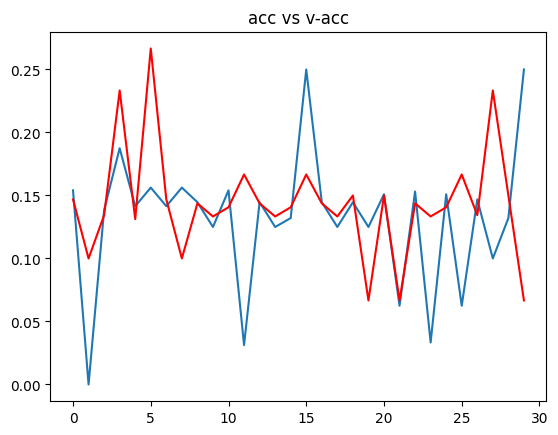

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

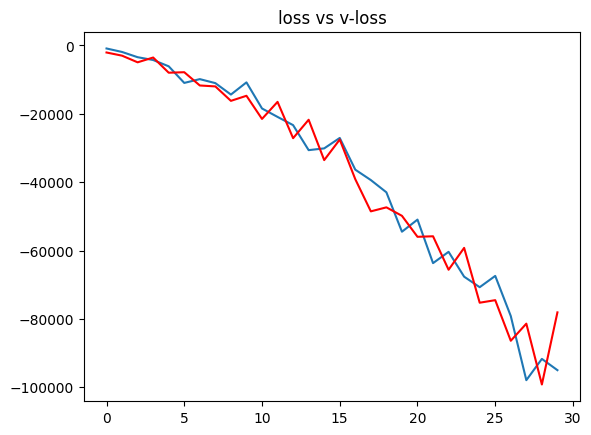

In [29]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [40]:
train_data = "/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train/"


In [41]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

AttributeError: 'str' object has no attribute 'class_indices'

In [42]:
# Map class indices to class labels
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

print(index_to_class)


{0: 'Angry', 1: 'Disguist', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 the image is of Angry


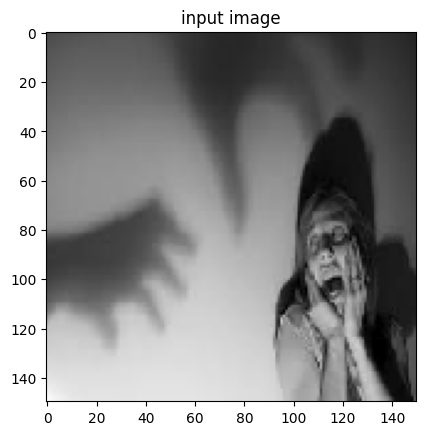

In [44]:
# path for the image to see if it predics correct class
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np 
path = "/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train/Fear/download (1).jpg"
img = load_img(path, target_size=(150,150) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {index_to_class[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [48]:
from tensorflow.keras.models import load_model

# Path to the saved model file
model_path = '/teamspace/studios/this_studio/Emotion-Detection-openCV/models/best_model.h5'

# Load the model
model2 = load_model(model_path)

# Optional: Print model summary to check its architecture


TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

Input shape: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The image is predicted to be: Angry
Predicted probabilities: [1.]


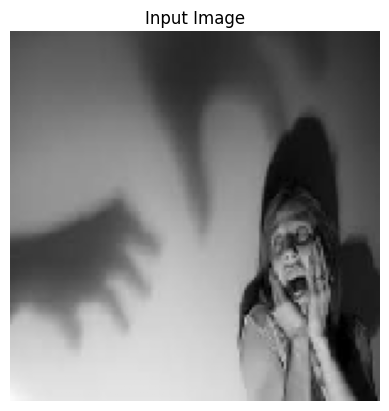

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Path to the image file
path = "/teamspace/studios/this_studio/Emotion-Detection-openCV/train/train/Fear/download (1).jpg"

# Load and preprocess the image
img = load_img(path, target_size=(150, 150))  # Load the image
img_array = img_to_array(img)  # Convert PIL image to numpy array
img_array = img_array / 255.0  # Normalize pixel values (assuming your model was trained with normalized data)
input_arr = np.expand_dims(img_array, axis=0)  # Add batch dimension

print("Input shape:", input_arr.shape)

# Example: replace with your actual model prediction process
pred_probs = model.predict(input_arr)[0]  # Assuming batch size 1, get predictions

# Get the predicted class index
predicted_class_index = np.argmax(pred_probs)

# Define the mapping of class indices to emotions
index_to_class = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Surprise'
}

# Map the predicted class index to the corresponding emotion label
predicted_emotion = index_to_class[predicted_class_index]

print(f"The image is predicted to be: {predicted_emotion}")
print("Predicted probabilities:", pred_probs)

# Display the image
plt.imshow(img_array)
plt.title("Input Image")
plt.axis('off')  # Optional: turn off axis if not needed
plt.show()
